In [1]:
import utils
import importlib
importlib.reload(utils)
from utils import *

/home/rcrespillo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#fi_sklearn = rf_feat_importance(rf, X_test)
#plot_fi(fi_sklearn, False, 'Sklearn');

In [3]:
path_dataset = "dataset/BlackFriday.csv"
df = pd.read_csv(path_dataset)

In [4]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
403352,1002012,P00217642,M,26-35,4,B,3,1,1,2.0,11.0,8105
140536,1003698,P00284042,M,26-35,7,B,0,0,8,17.0,NaN,1993
251066,1002760,P00112442,M,55+,0,C,1,0,6,8.0,NaN,20325
221699,1004140,P00061142,M,26-35,0,B,4+,0,8,16.0,NaN,5939
294310,1003410,P00069042,M,36-45,1,B,3,1,3,NaN,NaN,13306


In [5]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [6]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
# Mostrá los valores faltantes en esta celda
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
Product_Category_3,373299,69.441029
Product_Category_2,166986,31.062713
Purchase,0,0.000000


In [8]:
df_bk = df
df = df.drop(["Product_Category_3"], axis=1)

In [9]:
from sklearn.preprocessing import Imputer

In [10]:
imp = Imputer(strategy='most_frequent')
imp_surface_mean = imp.fit_transform(df[["Product_Category_2"]])
df[["Product_Category_2"]] = imp_surface_mean

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.index.isin(["Product_Category_2"])]

,Total,Percent
Product_Category_2,0,0.0


In [12]:
from sklearn.preprocessing import LabelEncoder

to_label_encoder = ["Product_ID", "Gender", "Age", "City_Category", "Stay_In_Current_City_Years"]

def label_encoder(label):
    #for label in to_label_encoder:
    le = LabelEncoder()
    df[[label]] = le.fit_transform(df[label])
    return df, le.classes_

df = label_encoder(df, to_label_encoder)[0]

In [13]:
df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
460323,1004852,1062,1,3,0,2,3,1,8,8.0,7899
166589,1001714,2734,1,2,17,2,0,1,2,5.0,13252
210454,1002445,9,1,2,0,0,1,1,1,2.0,15291
431063,1000345,2060,1,2,12,0,2,1,8,8.0,5930
298804,1004006,1014,1,0,7,2,3,0,1,2.0,15297
222787,1004326,140,0,4,13,1,1,1,8,8.0,7799
506789,1000035,2639,1,4,1,2,4,1,8,14.0,7991
24722,1003821,2674,1,2,20,0,2,1,8,8.0,6190
419275,1004480,1638,1,2,0,1,1,0,5,8.0,6893
212336,1002808,3012,1,6,16,0,3,0,15,8.0,12912


In [14]:
corr = df.corr()

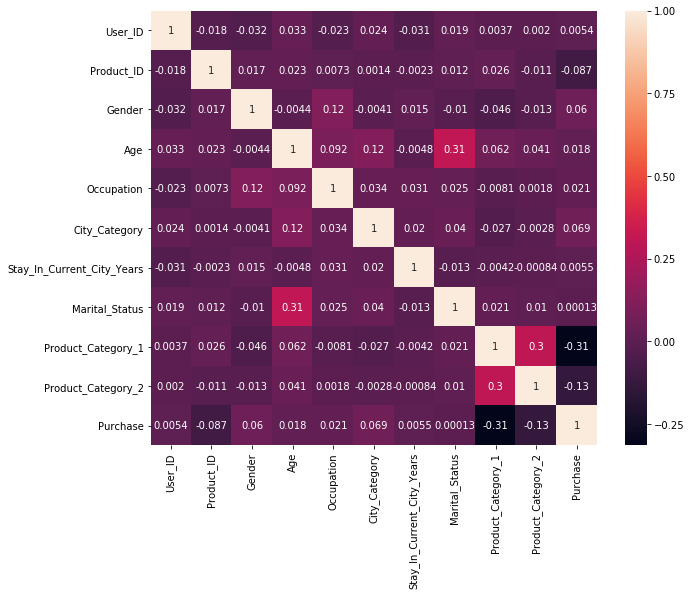

In [15]:
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True)
plt.show()

In [16]:
from sklearn.preprocessing import OneHotEncoder

to_label_encoder = ["Product_ID", "Gender", "Age", "City_Category", "Stay_In_Current_City_Years"]

def one_hot_encoder(df, to_one_hot_labels)
    for label in to_one_hot_labels:
        integer_encoded, integer_encoded_labels = 
        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = le_property_type.reshape(len(le_property_type), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        categoricals_df = pd.DataFrame(data=onehot_encoded, columns=le.classes_) 
        categoricals_df

NameError: name 'le_property_type' is not defined